In [67]:
import pandas as pd
import numpy as np

In [68]:
#1.Load the data file using pandas.
try:
    google=pd.read_csv("googleplaystore.csv")
    print(google.shape)
except:
    print("File Not Found")

(10841, 13)


In [69]:
#2.Check for null values in the data. Get the number of null values for each column.
nullval=(google.isnull()).sum()
nullval

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [70]:
#3.Drop records with nulls in any of the columns. 
google=google.dropna()

In [71]:
google.shape

(9360, 13)

In [72]:
#4Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 
#4.1Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
def find_size(x):
    if 'M' in x:
        return float(x.replace("M",""))*1000
    elif 'K' in x :
        return float(x.replace("K",""))*100
    else:
        return None
google['Size']=google['Size'].apply(lambda x:find_size(x))

In [73]:
#4.2Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
google['Reviews']=google['Reviews'].apply(lambda x:int(x))

In [74]:

'''
4.3 Installs field is currently stored as string and has values like 1,000,000+. 

   1. Treat 1,000,000+ as 1,000,000

   2. remove ‘+’, ‘,’ from the field, convert it to integer
'''
def Clean(x):
    x=x.replace('+',"")
    x=x.replace(',',"")
    return int(x)
google['Installs']=google['Installs'].apply(lambda x: Clean(x))



In [75]:
#4.4Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.
google['Price']=google['Price'].apply(lambda x: float(x.replace('$',"")))

In [76]:
#5. Sanity checks:
google=google.dropna()

In [77]:
#5.1 Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.
google=google.drop(google[(google['Rating'] > 5) | (google['Rating'] < 1)].index )
#5.2 Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.
google=google.drop(google[(google['Reviews'] >google['Installs']) ].index )
#5.3 For free apps (type = “Free”), the price should not be >0. Drop any such rows.
google=google.drop(google[(google['Type'] =='Free') & (google['Price'] >0) ].index )

In [78]:
import matplotlib.pyplot as pt


<function matplotlib.pyplot.show(*args, **kw)>

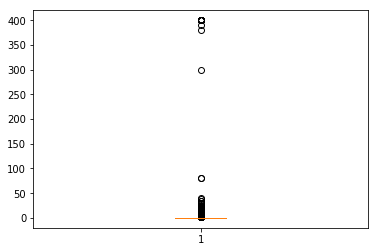

In [79]:
#5 Performing univariate analysis:
#5.1 Boxplot for Price
pt.boxplot(google['Price'])
pt.show
#Are there any outliers? Think about the price of usual apps on Play Store.
#Yes, price>200 look outliers

<function matplotlib.pyplot.show(*args, **kw)>

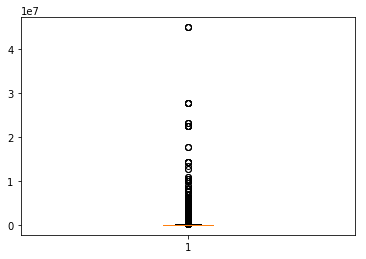

In [80]:
#5.2 Boxplot for Reviews
pt.boxplot(google['Reviews'])
pt.show
#Are there any apps with very high number of reviews? Do the values seem right?
#Yes, few apps have very high number of reviews.

(array([  17.,   18.,   38.,   68.,  126.,  386.,  736., 1334., 3130.,
        1607.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

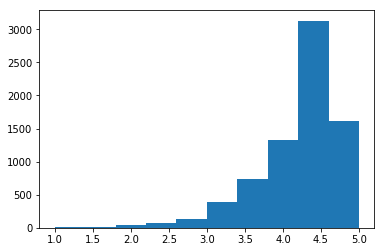

In [81]:
#Histogram for Rating
pt.hist(google['Rating'])
#How are the ratings distributed? Is it more toward higher ratings?
#yes Rating>4 are higher.

(array([2988., 1398.,  991.,  606.,  449.,  325.,  226.,  161.,  117.,
         199.]),
 array([  1000.,  10900.,  20800.,  30700.,  40600.,  50500.,  60400.,
         70300.,  80200.,  90100., 100000.]),
 <a list of 10 Patch objects>)

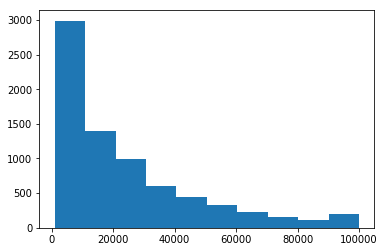

In [82]:
#Histogram for Size
pt.hist(google['Size'])
#Note down your observations for the plots made above. Which of these seem to have outliers?
#size>90000 seems outlier.

In [83]:
#6. Outlier treatment: 

#1.Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
#Check out the records with very high price

   #1.1. Is 200 indeed a high price?-Yes, BoxPlot shows these are outliers
print(google.shape)
    #1.2. Drop these as most seem to be junk apps
google=google.drop(google[(google['Price'] >200) ].index )
print(google.shape)

#3.Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.
google=google.drop(google[(google['Reviews'] >2000000) ].index )
print(google.shape)
#3. Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
print(np.percentile(google['Installs'], 10))
print(np.percentile(google['Installs'], 25))
print(np.percentile(google['Installs'], 50))
print(np.percentile(google['Installs'], 70))
print(np.percentile(google['Installs'], 90))
print(np.percentile(google['Installs'], 95))
print(np.percentile(google['Installs'], 99))

#3.2Decide a threshold as cutoff for outlier and drop records having values more than that -99 percentile
google=google.drop(google[(google['Reviews'] >50000000) ].index )


(7460, 13)
(7446, 13)
(7227, 13)
1000.0
10000.0
100000.0
1000000.0
10000000.0
10000000.0
50000000.0


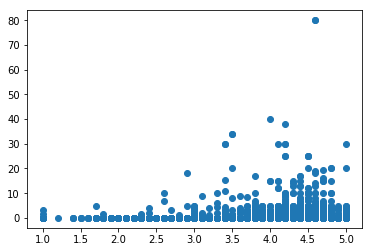

In [85]:
#7.Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.
#7.1 Make scatter plot/joinplot for Rating vs. Price
pt.scatter(google['Rating'],google['Price']) 


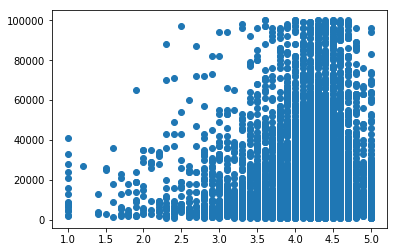

In [86]:
#7.2 Make scatter plot/joinplot for Rating vs. Size
pt.scatter(google['Rating'],google['Size']) 

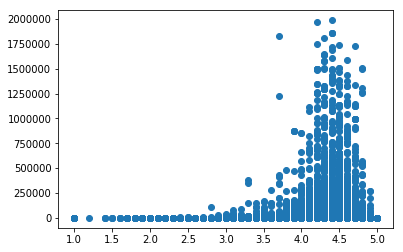

In [87]:
#7.3 Make scatter plot/joinplot for Rating vs. Reviews
pt.scatter(google['Rating'],google['Reviews'])

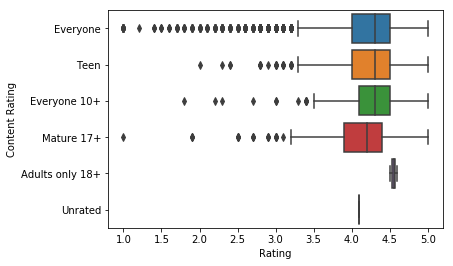

In [88]:
#7.4 Make boxplot for Rating vs. Content Rating
import seaborn as sns
sns.boxplot(x=google['Rating'],y=google['Content Rating'])
#Is there any difference in the ratings? Are some types liked better?


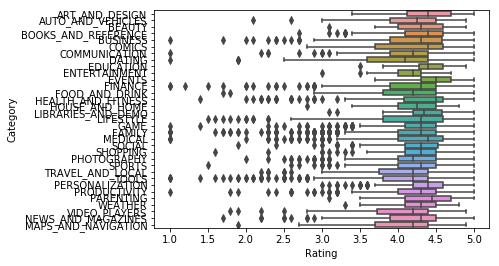

In [89]:
#7.5Make boxplot for Ratings vs. Category
sns.boxplot(x=google['Rating'],y=google['Category'])
#Which genre has the best ratings?


In [90]:
#8.1
#  Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

inp1=google.copy()

In [91]:
inp1['Reviews']=np.log1p(inp1['Reviews'])

In [92]:
inp1['Installs']=np.log1p(inp1['Installs'])

In [93]:
#8.2Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.
inp1=inp1.drop(columns=['App','Last Updated','Current Ver','Android Ver'])

In [94]:
#8.3Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.
inp2=pd.get_dummies(inp1,columns=['Category','Genres','Content Rating','Type'])

In [96]:
#9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.
#10. Separate the dataframes into X_train, y_train, X_test, and y_test.
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(inp2,test_size=0.3)
y_train=df_train['Rating']
X_train=df_train.drop(columns=['Rating'])

y_test=df_test['Rating']
X_test=df_test.drop(columns=['Rating'])


In [97]:
#11 . Model building
#Use linear regression as the technique
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)




0.15924828660393409

In [98]:
X_predict=reg.predict(X_test)
y_test1=[i for i in y_test]



In [100]:

from sklearn.metrics import r2_score
r2_score(y_test1,X_predict)


0.12508542947780577